In [1]:
options(repr.plot.weight=8,repr.plot.height=4) #Tamaño del grafico

## Función para transformar datos  APLICAR_TRANSFORMACION()

In [2]:
aplicar_transformacion<-function(serie=x,tipo=1,retardo=1){ #la serie por defecto será x,
                                                  ##El tipo 1 (por defecto) hará referencia a la diferenciacion de los datos (Cambio Absoluto)
                                                  ###El tipo 2 hará referencia a la transformacion Pt/Pt-1 (Rentabilidad bruta simple)
                                                  ####El tipo 3 hara referencia a la tranformacion Pt/Pt-1 -1 (Rentabilidad neta simple)
                                                  #####El tipo 4 hara referencia la transformacion log(Pt/Pt-1) Rentabilidad logaritmica
                                                  ######El tipo 5 hara referencia a la transformacion raiz cuadrada
                                                  #######El tipo 6 hara referencia  a la transformacion raiz cubica
                                                  ########El tipo 7 hara referenica a la transformacion ln(Pt)
    if(tipo==1){
        transformada<-diff(serie,retardo)
    }
    if(tipo==2){
        transformada<-c(NaN,serie[2:length(serie)]/serie[1:length(serie)-1])
    }
    
    if(tipo==3){
        transformada<-c(NaN,(serie[2:length(serie)]/serie[1:length(serie)-1])-1)
    }
    
    if(tipo==4){
        transformada<-c(NaN,log(serie[2:length(serie)]/serie[1:length(serie)-1]))
    }
    
    if(tipo==5){
        transformada<-sqrt(serie)
    }
    
    if(tipo==6){
        transformada<-(serie)^(1/3)
    }
    
    if(tipo==7){
        transformada<-log(serie)
    }
    return(transformada)
}

#Construir inversa



## Función para calcular los estadísticos descriptivos básicos

In [3]:
estadisticos_basicos<-function(serie=x,num_dec=6){ #informa los estadisticos descriptivos básicos de una serie, 
                                                   #se pueden configurar los decimales!!
    #library(moments)
    media<-round(mean(serie),num_dec)
    varianza<-round(var(serie),num_dec)
    asimetria<-round(skewness(serie),num_dec)
    curtosis<-round(kurtosis(serie),num_dec)
    total_datos<-length(serie)
    minimo<-round(min(serie),num_dec)
    maximo<-round(max(serie),num_dec)

    estadisticos<-c(media=media,varianza=varianza,asimetria=asimetria,curtosis=curtosis,minimo=minimo,maximo=maximo,total_datos=total_datos)
    return(estadisticos)
}

## Imprimir el histograma comparado con una normal y el ajuste no parametrico

In [4]:
imprimir_histograma<-function(serie=x,leyenda="topleft"){
    hist(serie,breaks=100,freq=FALSE,main="Histograma")                                      #imprime el histograma 
    datos_normales<-rnorm(1000000,mean = mean(serie),sd=sqrt(var(serie)))                    #propone una serie normal
    curve(dnorm(x,mean(datos_normales),sd(datos_normales)),col="blue",lty=2,lwd=3,add=TRUE)  #dibuja una campana normal
    d<-density(serie)                                                                        #Densidad no parametrica
    lines(d,col="red",lwd=2)                                                                 #Dibuja una densidad no parametrica
    
    legend(leyenda,c("Distribución no parametrica","Distribución normal"),col=c("red","blue"),lwd=c(3,3),bty="n") #Leyenda
}

## Gráfico qqplot para identificar linealidad de la serie

In [5]:
grafico_qqplot<-function(serie=x){
    qqnorm(serie, main="Gráfico Q-Q")
    qqline(serie)
}

## ACF y PACF de la serie - graficos_ACF

In [6]:
graficos_ACF<-function(serie=x,nombre=" ",retardos=1){
    par(mfrow=c(1,1))
    acf(serie,retardos,main=nombre)
    pacf(serie,retardos,main=nombre)
}

In [7]:
datos<-read.csv("Precios_1995.csv", header=TRUE, sep = "," ,dec = ".") # Cargo la base de datos donde estan mis series de precios y variables explicativas

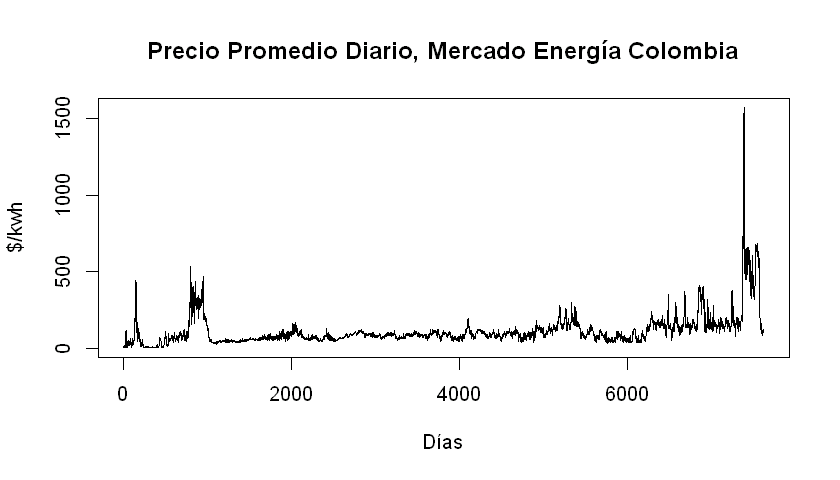

In [8]:
x<-datos$X..KWh_Const_Dic_2008 #Se separan los datos de interes, los precios sin inflacion
x<-ts(x,frequency = 1) #se le da formato  de serie de tiempo a nivel diario
plot(x,ylab = "$/kwh",xlab = "Días",main="Precio Promedio Diario, Mercado Energía Colombia") # Imprimir el comportamiento del precio


## Definición de Ruido Blanco

Un proceso de Ruido Blanco representa una variable que:

1. Oscila en torno a una media constante $\mu$ =constante
2. Tiene una volatilidad constante $\sigma^2$ = constante
3. Los datos son incorrelacionados entre si


http://es.slideshare.net/enriqueorlando/analisis-deseriestemporales?next_slideshow=1 estudio de series de tiempo

http://rstudio-pubs-static.s3.amazonaws.com/14623_4a17c643af9a4300b88bb2a44d2ffb27.html codigo makdown

# Cap 2: Analisis de series de tiempo y sus aplicaciones - Libro Tsay
En este capitulo se define la teoria básica del análisis de series de tiempo para construir modelos econometricos utiles para analisis financieros y aplica los modelos para series financieras como retornos de activos.

Los modelos econometricos incluyen:
1. Autorregresivos simples AR(p)
2. Medias moviles simples MA(q)
3. Combinacion de aurtorregresivos y medias moviles ARMA (p,q)
4. Raices unitarios no estacionarias 
5. Modelos de regresion con errores de series de tiempo
6. Modelos Fraccionalmente diferenciados con larga dependencia

Los modelos utilizados para los retornos de los activos, intentan capturar las relaciones lineales entre $r_t$ y la informacion disponibles anterior al tiempo $t$

## Estacionareidad
El fundamento principal del analisis de las series de tiempo es la **estacionareidad**. En otras palabras, la estacionareidad estricta requiere que la distribucion conjunta sea invariante bajo el cambio del tiempo, esto es muy dificil de demostrar porque se adopta el termino de **"estacionareidad debil"**, que se da si:
* $E(r_t)= \mu$, la cual es constante
* $ Cov(r_t,r_t-1)= \gamma_l$, la cual solo depende de $l$

En la practica, la estacionareidad debil implica que al graficar los puntos, todos fluctuan alrededor de una constante o nivel fijo. Esto nos permite hacer inferencias con respecto a futuras observciones (predicciones).

Asumimos que los dos primeros momentos de $r_t$ son finitos

Si los datos estan normalmente distribuidos, decimos que la estacionareidad debil equivale a la estricta estacionareidad



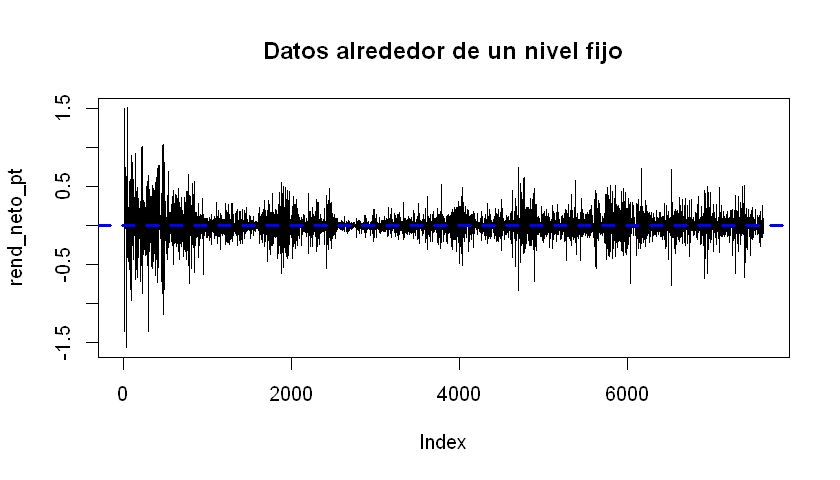

In [9]:
rend_neto_pt<-aplicar_transformacion(x,tipo = 4)

plot(rend_neto_pt,type="l",main="Datos alrededor de un nivel fijo")
abline(h = 0, lwd=3,lty=2, col="blue")

## Ruido Blanco
Una serie de tiempo es un **Ruido Blanco** si $r_t$ es una secuencia de independientes e identicamente distribuidos de una variable aleatoria con media y varianza finita.

En particular si $r_t$ es normalmente distribuida con media ero y varianza $\sigma^2$, se dice que es un **Ruido Blanco Gaussiano**.

### En la pratica si todos los valores de la ACF son cero, se dice que es un Ruido Blanco!



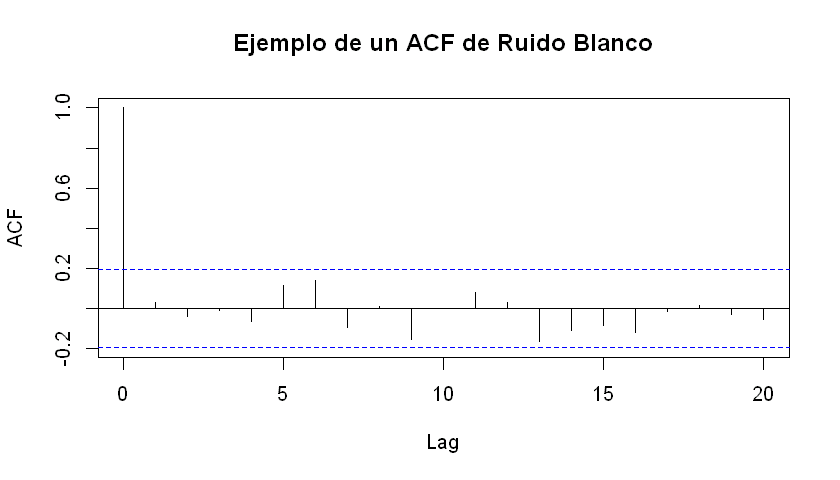

In [10]:
ruido_blanco<-rnorm(n = 100, mean = 0,sd = 9)
acf(ruido_blanco,main="Ejemplo de un ACF de Ruido Blanco")


## Serie de Tiempo Lineal

Una serie de tiempo dice ser lineal si puede ser escrita de la forma:

## $r_t= \mu + \sum_{i=0}^{\inf} \psi a_{t-i}$ ecuacion (2.4)

Donde $mu$ es la media de $r_t$, $psi_0=1$, y {$a_t$} es una secuencia de variables aleatorias iid con media cero osea es un ruido blanco. Más adelante se llamará a $aa_t$ como las **innovaciones** o **shock** en el tiempo $t$.

Para una serie de tiempo lineal la estructura dinamica de la serie es gobernada por los coeficientes $psi_i$ los cuales son llamados **Ponderadores**  de $r_t$ en la literatura de series de tiempo.

Si $r_t$ es debilmente estacionaria, podremos obtener su media y si varianza facilmente usando la independencia de $a_t$ como:

## $E(r_t) = \mu$        
## $Var(r_t)=\sigma^2 \sum_{i=0}^{inf} \psi_i^2$  ecuacion (2.5)

Donde $\sigma^2$ es la varianza de $a_t$

La covarianza tambien se puede escribir en terminos de la innovacion o shock de la serie de tiempos

## Modelos Autorregresivos Simples AR($p$)
Los modelos que dependen de un retardo se pueden escribir como:

## $r_t=\phi_0 +\phi_1 r_{t-1} + a_t$,

donde $a_t$ es Ruido Blanco con media cero. El anterior modelo es un AR(1) y tambien servirá oara modelar la volatilidad más adelante

## Esperanza y Varianza

## $E(r_t|r_{t-1})=\phi_0 + \phi_1 r_{t-1}$
## $Var(r_t|r_{t-1})=Var(a_t)= \sigma^2$

Esto significa que, dado el retardo anterior $r_{t-1}$, el valor actual estara alrededor del valor $\phi_0 +\phi_1 r_{t-1}$ con una desviacion estandar $\sigma_a$

En general el modelo AR(p) se puede escribir como:

## $r_t=\phi_0 + \phi_1 r_{t-1}+...+\phi_p r_{t-p} + a_t$ ecuacion (2.8)

# Propiedades de los Modelos AR

comenzamos con la condicion necesaria y suficiente para la estacionareidad debilde los AR(1) donde tenemos que:
## + $E(r_t)= \mu$
## + $Var(r_t)= \gamma_0$
## + $Cov(r_t,r_{t-j})=\gamma_j$

Con esto podremos obtener facilmente la media, varianza y la autocorrelacion de la serie como se indica a continuacion:

1. Tomando la esperanza a ambos lados de la ecuacion 2.8 y como $E(a_t)=0$

$E(r_t)=\phi_0 + \phi_1 E(r_{t-1})$

Bajo la condicion de estacionariedad $E(r_t) =E(r_{t-1})=\mu$, entonces:

$\mu=\phi_0+\phi_1 \mu$

O en general $E(r_t)=\mu= \frac{\phi_0}{1-\phi_1}$

El anterior resultado tiene dos implicaciones para $r_t$:

+ La media de $r_t$ existe si $\phi_1<>1$
+ La media de $r_t$ es cero si $\phi_0=0$
+ El centro  o valor central estará dado entonces por $\phi_0=(1-\phi_1)\mu$
+ En general el AR(1) existe si |$\phi_1$| < 1
+ Un AR(p) es estacionario si sus raices son < 1

## Modelo AR(2)

tiene la forma:

## $r_t=\phi_0 + \phi_1 r_{t-1} + \phi_2 r_{t-2} + a_t$

## $E(r_t)=\mu=\frac{\phi_0}{1-\phi_1-\phi_2}$

Usando algunos resultados podemos llegar a que para satisfacer un AR(2), se debe cumplir la siguiente ecuacion:

$1-\phi_1 x -\phi_2 x^2=0$

Con el discriminante de la ecuacion se puede saber si los ponderadores $\phi_i$ son numeros reales o imaginarios:

## $\sqrt{\phi_1^2+4\phi_2} > 0$  Si esto no se cumple el ACF se mostrará como senoidal

In [21]:
# Para determinar la mejor p que modele los datos con AR(p), se puede usar la funcion ar() y el argunmento "mle" asi:
diff_pt<-aplicar_transformacion(x,tipo=1,retardo = 1)
m_ej<-ar(diff_pt,method="mle")
m_ej$order

[1] 12

## Identificar modelos AR en la practica

La definicion del orden $p$ es dificil. Hay dos formas:

+ Usando la PACF
+ Usando criterios de informacion

### PACF
La PACF de una serie de tiempo estacionaria es una funcion de sus ACF y es una herramienta util para determinar el orden $p$ del modelo

El valor estimado de $\hat{\phi_i}$ se refiere a la contribucion agregada $r_{t-i}$ sobre $r_t$

Por lo tanto el orden $p$ de la serie sera el ultimo valor que no sea cero en la PACF

## Criterios de Informacion
El más usado es el AIC que esta definido como:

## $AIC=\frac{-2}{T}ln(probabilidad)+\frac{2}{T}Numero de Parametros$
Donde T es el tamaño de la muestra

Para un AR($l$) el AIC es:

## $AIC(l)=ln(\sigma^2)+\frac{2l}{T}$

# Verificacion del modelo
Si el modelo ajustado es adecuado para modelar los datos, los residuales deben comportarse como un **Ruido Blanco**

Para verificar esto se puede usar:
+ El ACF que sea cero
+ El estadistico de Ljung-Box

# Bondad de ajuste
Un estadistico comun usado para medir la bondad de ajuste es el $R^2$ que esta definido como:


# Pronosticos

El objetivo de desarrollar estos modelos es poder inferir uno o más pasos hacia adelante

# Modelos Medias Moviles Simples MA(q)

## MA(1)

## $r_t=c_0 + a_t - \theta_1 a_{t-1}$

Donde $c_o$ es una constante y $a_t$ es Ruido blanco

# Propiedades de un modelo MA

## Estacionareidad
Los modelos MA son siempre estacionarios porque son una combinacion lineal de un ruido blanco para los cuales sus dos primeros mommentos son invariantes

## ACF

En el ACF los $retardos_q$ no son cero y el resto son cero 
## Invertibilidad

Se puede expresar el ruido blanco como una combinacion lineal de de los retardos de la serie

## Identificar modelos MA en la practica
Imprimir el ACF y el ultimo retardo que no sea cero es el dato de la q, tomando para la ecuacion todos los que no cero osea que se descartan aquellos que salen en cero dentro del ACF


# Modelos ARMA($p$,$q$)
En ocasiones para modelar con un AR($p$) o un MA($q$) se necesitan muchos parametros y se vuelve complejo. 

Por esta razon se introducen los modelos ARMA($p,q$) que de una forma compacta no tienen que usar tantos parametros. Para los retornos financieros, la oportundad de usar estos modelos es baja pero es muy util para modelar la volatilidad (Modelos GARCH)

En general la forma de un ARMA es:

## $r_t-\phi_1 r_{t-1}=\phi_0 + a_t - \theta_1 a_{t-1}$

Donde $a_t$ es un **Ruido Blanco**, la parte izquierda es la componente de un AR y la parte derecha es la componennte de un MA
La constante es $\phi_0$ y se necesita que $\phi_1 \not= \theta_1$ de otra forma se produciria un ruido blanco

## Propiedades de los modelos ARMA($1,1$)

+ $E(r_t)=\mu=\frac{\phi_0}{1-\phi_1}$
+ $Var(r_t)=\frac{(1-2\phi_1\theta_1 +\theta_1^2)\sigma_a^2}{1-\phi_1^2}$
+ El ACF de un ARMA(1,1) es el mismo de un AR(1) pero la caida exponencial comienza en el retardo 2

## Idenficando modelos ARMA

Los graficos de ACF y PACF no son informativos para un modelo ARMA. Tsay y Tiao (1984) proponen una aproximacion que utiliza la EACF para especificar un los parametros del ARMA.
Los resultados del EACF es una tabla de dos dimensiones, las filas corresponden al orden $p$ y las columnas el orden $q$. Se formará un triangulo en la parte superior de la matriz y el vertice será el orden p,q.

1. X dice que el valor absoluto de la EACF es mayor o igual que $\frac{2}{\sqrt{T}}$
2. O dice que el valor del EACF es menor que $\frac{2}{\sqrt{T}}$


# Raices unitarias no estacionarias

Hasta el momento nos hemos enfocado en las series que son retornos que son estacionarias. En algunos casos las tasas de interes, tasas de cambio de moneadas extranjeras o los precios de los activos son de interes. Estas series tienden a ser no estacionarias. Para una serie de precios, la no estacionareidad es principalmente dada por el hecho de que no hay un nivel de precios fijos. En la literatura de series de tiempo las series no estacionarias se llaman Series de tiempo con raices unitarias no estacionarias.

El mejor ejemplo de estas es el modelo de **Caminata Aleatoria**

## Caminata aleatoria

Una serie de tiempo $P_t$ es una caminata aleatoria si satisface que:

## $P_t=P_{t-1}+a_t$

Donde:
+ $P_0$ es un numero real donde inicia el proceso y 
+ $a_t$ es un ruido blanco

Si $p_t$ es log de precios de una accion en particular en el tiempo $t$, luego $p_0$ podria ser un log de precios de esa misma accion en su oferta inicial (IPO).

Si $a_t$ es una distribucion simetrica y centrada en cero en $p_{t-1}$ entones $p_t$ tiene un 50-50 de oportunidad de ir hacia arriba o hacia abajo. Esto implica que $p_t$ iria hacia arriba o hacia abajo de manera aleatoria.

Si nosotros intentamos ajustar un modelo $AR(1)$ el coeficiente de $p_{t-1}$ seria 1, lo cual no satisface la condicion de estacionareidad debil que hemos definido previamente. Por lo tanto una **Caminata Aleatoria** no es estacionaria en su media

Las caminatas aleatorias son consideradas para representar modelos de los precios de acciones. Bajo cada modelo, el precio de la accion no es predecible o no revierte a la media

Una representacion MA de la caminata aleatoria es:

## $p_t=a_t+a_{t-1}+a_{t-2}+...$

- La longitud de un intervalo de prediccion se acerca a infinito a medida que aumenta el horizonte de pronostico. Esto hace que el modelo sea inutil a lo largo del tiempo, lo que implica que el modelo es no predecible
- la varianza incondicional de $p_t$ no esta limitada porque se aproxima a infinito cuando aumenta el periodo de tiempo.
- Como para $\psi_i = 1 $ el impacto de cualquier innovacion del pasasdo $a_{t-i}$ no decae con el tiempo. Por lo tanto las series tienen una fuerte memoria y recuerdan todas las innovaciones del pasado

## Caminata aleatoria con deriva

Como hemos dicho hasta ahora, los retornos log de un indice de un mercado tienden a tener una media. Esto implica que el modelo de los log precios es:

## $p_t=\mu + p_{t-1} + a_t$

Donde:

- $\mu=E(p_t -p_{t-1}) $
- $a_t$ es un ruido blanco (0,$\sigma^2$)

El termino $\mu$ es muy importante en estudios financieros porque representa la tendencia en el tiempo de los log precios y es conocida como la deriva del modelo y definirá la pendiente de la grafica.

## Interpretacion de la constante

+ Para un MA(q), la constante simplemente es la media de la serie
+ Para un AR(p) o un ARMA(p,q) la media se relaciona con el termino independiente con $\frac{\phi_0}{1 - \phi_1 -...-\phi_p}$
+ Para una caminata aleatoria con deriva, el termino independiente es la pendiente de la serie

Otra importante diferencia entre los modelos dinamicos y de regresion es evidenciado en un AR(1) y una regresion lineal.

+ En un AR(1) $\phi_1 \leq 1$
+ En una regresion lineal $\beta_1$ puede asumir cualquier valor fijo



## Series de tiempo con tendencia estacionaria

Un modelo que exhibe tendencia estacionaria es:

## $p_t=\beta_0+\beta_1t + r_t$ 

Donde $r_t$ es una serie de tiempo estacionaria por ejemplo un AR(p).

En esta serie con tendencia, $p_t$ crece linealmente con la tasa de $\beta_1$ y tiene un comportamiento similar a una caminata aleatoria con deriva. Las diferencias entre una caminata aleatoria y una serie de tiempo con tendencia estacionaria son:

### **Caminata aleatoria**
+ $E(p_t)=p_0 + \mu t$
+ $Var(p_t)=t\sigma_a^2$

Ambas dependen del tiempo

### **Modelo con tendencia estaciaria**
+ $E(p_t)=\beta_0+\beta_1t$ Depende del tiempo!!!
+ $Var(p_t)=Var(r_t)=\sigma^2$ Es finita e invariante en el tiempo!!!

Las series de tiempo con tendencia estacionaria se pueden transformar en estacionarias usando un analisis de regresion lineal simple.

**Pendiente describir el metodo 2.9**


## Modelos no estacionarios generales con raices unitarias

Si relajamos el supuesto que $\phi_1$ pueda ser igual 1, entonces tendremos **los modelos ARIMA**

Para manejar esta situacion se usa la **Diferenciacion**

## Diferenciacion:

Es tomar la serie de tiempo y convertir sus datos:

$c_t=y_t-y_{t-1}$

Si con esta transformacion se puede construir un modelo ARMA(p,q) se dice que es lo mismo que un ARIMA(p,1,q)

En finanzas es comun decir que una serie de precios es no estacionaria, pero la serie de retornos diferenciada si es estacionaria $r_t=ln(P_t)-ln(P_{t-1})$ y luego se pueden tratar como un ARIMA.

## Prueba de raices unitarias
Para probar si el log$p_t$ de un activo sigue una caminata aleatoria o una caminata aleatoria con deriva, se emplean los modelos:
\phi_0+
###   $p_t=\phi_1p_{t-1} + e_t$
###   $p_t=\phi_0+\phi_1p_{t-1} + e_t$

Donde $e_t$ es el termino del error y se considera la hipotesis nula que:

+ $H_0: \phi_1 =1 $
+ $H_a: \phi_1 <1 $

Esta es la prueba de Dickey Fuller, si los $e_t$ son un ruido blanco y tienen momentos finitos de orden mayor que 2, luego el estadistico DF converge a una funcion de Movimiento Browniano


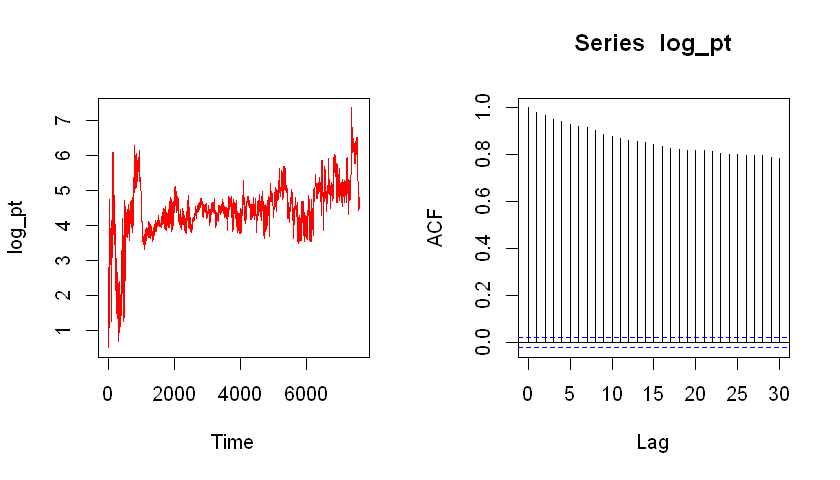

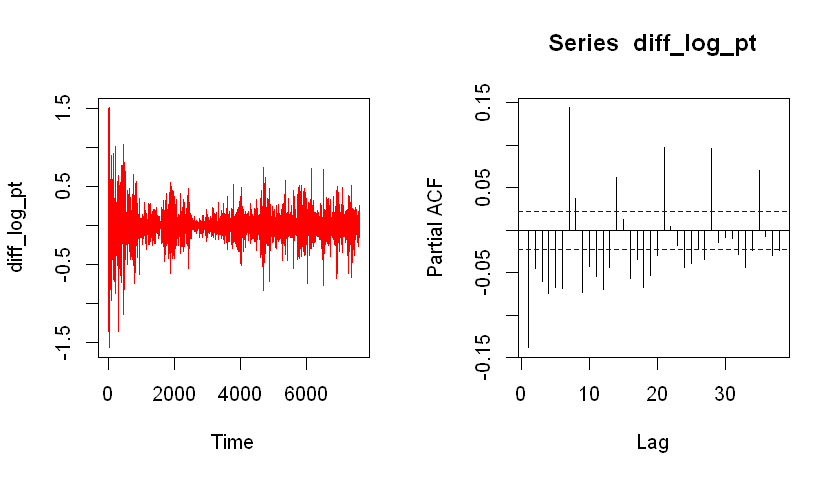

In [22]:
#Segun el ejemplo de Tsay pagina 78 se imprimen los correspondientes graficos de los precios de bolsa
par(mfrow=c(1,2)) #Divido la pantalla en 4
log_pt<-aplicar_transformacion(x,tipo=7)
plot(log_pt,col="red") #Imprimo los logaritmos de los precios
acf(log_pt,30) #Imprimo el ACF donde se muestra que hay una memoria larga y la presencia de raices unitarias

diff_log_pt<-aplicar_transformacion(serie = log_pt,tipo = 1,retardo = 1) # Diferencio los logaritmos de los precios con retardo 7
plot(diff_log_pt, col="red")
pacf(diff_log_pt)


## Series de tiempo estacionales
Algunas series de tiempo tienen patrones ciclicos o periodicos 

## Diferenciacion estacional
Para analizar las series estacionales, es comun tomar el logartimo de la serie por dos razones:
+ Para hacerse cargo del crecimiento exponencial de la serie
+ Para estabilizar la variabilidad de la serie.
**En algunas series, si contienen rendimientos negativos, es necesario anteponer una constante a los datos antes de tomar el logaritmo**


Al diferenciar una vez se observará el comportamiento estacional que tienen los datos.

** En el caso de los precios promedio de la bolsa de energia, la estacionalidad esta en la semana**

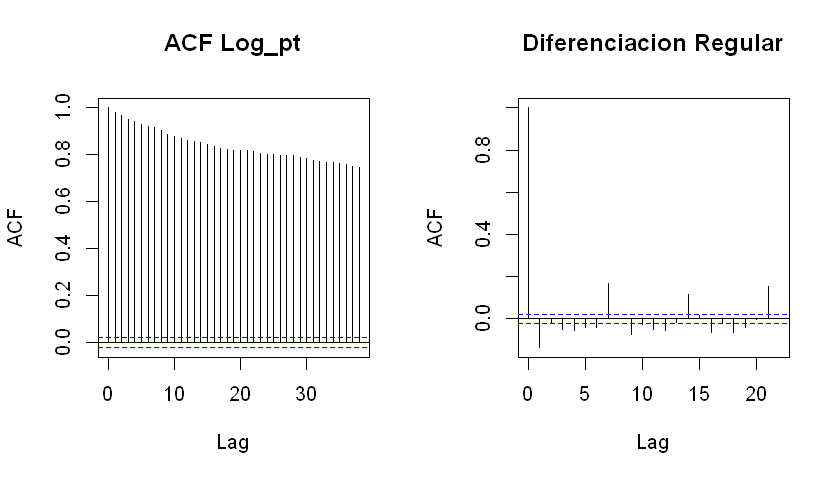

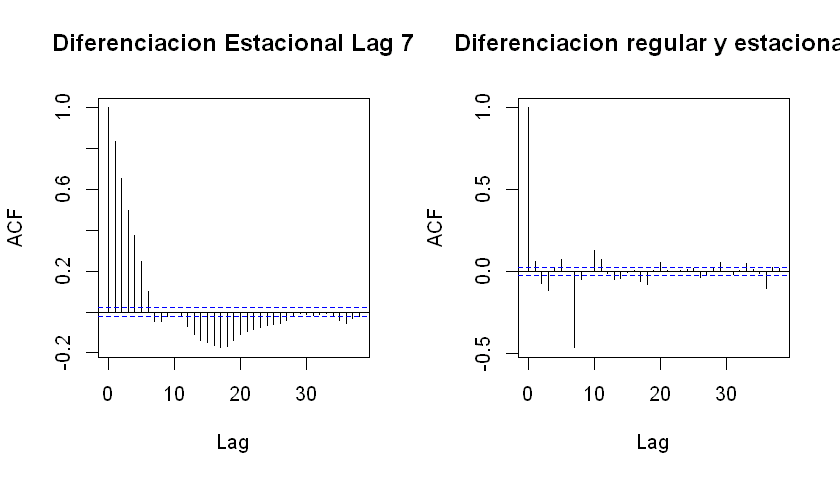

In [59]:
#Segun el ejemplo de la pagina 83
par(mfrow=c(1,2))
acf(log_pt,main="ACF Log_pt") #Imprimo los logaritmos de los precios
acf(diff_log_pt,main="Diferenciacion Regular",lag.max = 22) #imprimo el ACF de la primera diferenciacion de los precios
diff_log_pt_lag_7<-aplicar_transformacion(x,tipo=1,retardo = 7)
acf(diff_log_pt_lag_7,main="Diferenciacion Estacional Lag 7")

diff_multiplicativa_pt<-aplicar_transformacion(diff_pt,tipo = 1,retardo = 7)# Esto es la diferenciacion multiplicativa de pt 
acf(diff_multiplicativa_pt, main="Diferenciacion regular y estacional")

## Modelos multiplicativos estacionales
El comportamiento de un ACF muestral de $(1-B^s)(1-B)x_t=(1-\theta B)(1-\Theta B^s)a_t$ presentado en el ACF anterior, es comun entre las series de tiempo estacionales. Donde $s$ es la periodicidad de la serie, $a_t$ es un ruido blanco, $|\theta|<1$ y $|\Theta|<1$.

A este modelo se le conoce como **El modelo de aerolinea**.

Cuando el patron estacional de la serie es estable en el tiempo, se puede utilizar una variable dummy para manejar la estacionalidad de la serie. La estacionalidad deterministica es un caso especial de los modelos estacionales multiplicativos. (Especialmente si $\Theta=1$). Cuando la muestra es pequeña se aconseja no utlizar las variables dummies para modelar la estacionalidad



In [60]:
## Ejemplo pagina 89 adaptado a precios de bolsa
semana<-rep(c(1,rep(0,6)),1088)
mod1<-lm(log_pt[1:(length(log_pt)-6)]~semana)
summary(mod1)


Call:
lm(formula = log_pt[1:(length(log_pt) - 6)] ~ semana)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9435 -0.3247  0.0036  0.3776  2.8755 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.456942   0.009477 470.307   <2e-16 ***
semana      0.030381   0.025073   1.212    0.226    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7657 on 7614 degrees of freedom
Multiple R-squared:  0.0001928,	Adjusted R-squared:  6.148e-05 
F-statistic: 1.468 on 1 and 7614 DF,  p-value: 0.2257


In [61]:
#Entender más esta parte Validar con el profe
mod2<-arima(log_pt[2:(length(log_pt)-6)],order=c(1,0,1),seasonal = list(order=c(1,0,1),period=7),include.mean = F)
mod2


Call:
arima(x = log_pt[2:(length(log_pt) - 6)], order = c(1, 0, 1), seasonal = list(order = c(1, 
    0, 1), period = 7), include.mean = F)

Coefficients:
         ar1      ma1    sar1     sma1
      0.9746  -0.1329  0.9993  -0.9586
s.e.  0.0031   0.0117  0.0003   0.0048

sigma^2 estimated as 0.01887:  log likelihood = 4300.23,  aic = -8590.47

## Modelos de regresion con series de tiempo en errores

En muchas aplicaciones,la relacion entre dos series de tiempo es el principal interes.
Un ejemplo obvio es el modelo del mercado en finanzas que relaciona los retornos de una accion con los indices del mercado.

El modelo general es:

## $y_t=\alpha + \beta x_t + e_t$

Donde $y_t$ y $x_t$ son dos series de tiempo y $e_t$ es error temporal. El metodo de estimacion de minimos cuadrados simples es usado para estimar el modelo. Si $e_t$ es un ruido blanco, luego el modelo estará bien estimado.

En la practica se suele ver que el $e_t$ esta correlacionado. En estos casos, los estimadores estimados no son consistentes.

Se pueden hacer regresiones lineales pero si el ACF muestra que hay correlacion entre los residuos y decaen lentamente, no sirve para nada y se dice que hay presencia de raices unitarias en la serie.

Al tener presencia de una raiz unitaria, se procede entonces a diferenciar la serie y a volver a considerar una regresion lineal que siga los nuevos datos. Se revisará entonces el ACF nuevo y si continua mostrando una alta correlacion pero con magnitudes menores. Esto puede ser modelado usando un modelo de series de tiempo simples (vistos anteriormente) y esto será una **regresion lineal con una serie de tiempo en los errores**

El objetivo de esta seccion es trabajar con series que tienen regresiones en los errores y se presenta un ejemplo sencillo.

Tomemos entonces el modelo: $c_{3t}=0.792c_{1t}+e_t$ y de acuerdo con el ACF de los residuos se estima un modelo MA(1) para modelar los errores 

### En resumen el procedimiento para trabajar series de tiempo con regresion en los errores es:
1. Ajustar un modelo de regresion lineal y revisar el ACF de los residuales
2. Si los residuales exhiben raices unitarias, tomar la primera diferenciacionde ambas variables. Luego ir al paso 1. Si el ACF parece ser estacionario, ajustar un modelo ARMA para los residuales .
3. Probar el modelo.

Para validar la correlacion de los errores se recomienda usar el estadistico de Durbin-Watson porque considera la correlacion de los retardos.

## Estimacion de la matriz de covarianza consistente
Consideremos de nuevo el modelo $y_t=\alpha + \beta x_t + e_t$ hay situaciones en las que los $e_t$ tienen una correlacion o heteroscedastcidad condicional, pero el objetivo de analisis es hacer inferenccias sobre los coeficientes de la regresion $\alfa$ y $\beta$ 

# No me queda muy claro el objetivo de esta seccion para el tema de los errores!!!





## Modelos de memoria larga
Hemos hablado que para las series estacionarias, el ACF decae exponecialmente a cero mientras los retardos aumentan.
Aunque para las series con raices unitarias el ACF converge a 1. Existen unas en la cuales el ACF decaen lentamente a cero estos proceso son llamados de memoria larga. Uno de tales ejemplos es el proceso que es diferenciado por asi:

## $(1-B)^dX_t=a_t,        $  $ -0.5<d<0.5,$

Donde $a_t$ es un ruido blanco. Las propiedades de este tipo de series son:

+ Si $d<0.5$ luego $x_t$ es debilmente estacionaria y tiene un MA infinito
+ Si $d>0.5$ luego $x_t$ es invertible y tiene un AR infinito
+ Si $-0.5<d<0.5$ el ACF de $x_t$ tiene una ecuacion especial, el PACF tiene una ecuacion especial, ver pagina 102

Para nosotros ahora es de nuestro interes cuando $d<0.5$. La propiedad dice que $\rho_k \sim k^{2d-1}$ lo cual dice que el ACF decae de acuerdo a una tasa polinomica y no de acuerdo a una tasa exponencial. Por esta razon se dice que el proceso es de memoria larga.

Cuando la diferenciacion es un decimal entre -0.5 y 0.5 se dice que sigue un modelo ARFIMA($p,d,q$).
que es un ARIMA que acepta numeros decimales en $d$.

Los modelos de memoria larga son trabajados con Movimientos Brownianos en los modelos de tiempo continuo

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.2 



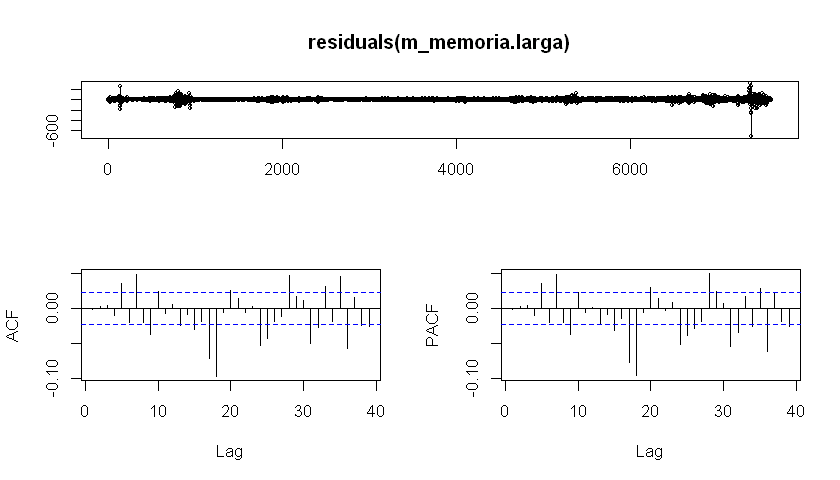

In [23]:
library(forecast)
m_memoria.larga<-arfima(diff_pt)
tsdisplay(residuals(m_memoria.larga))

http://www.statmethods.net/graphs/scatterplot.html

In [62]:
## Notas  10 de noviembre de 2016
#allitbooks libro pytonforfinance evaluacion de opciones modelos etc
#ahi estan los modelos estocasticos de tasas de inteeres

#Un paquete de R o python para hacer cualquier modelo arima como en la lbrary forecast

#Hay un inventario de modelos de precios de electricidad precios continuos, especialiazdos en modelos de electricidad.

#Jstat un paper para describir la libreria se isntala asi se usa de esta forma ejemplos de las corridas.

#Son 10 12 modelos, pilipovic, analizar resultados.

#En R dos funciones una es la que estima el modelo y otra es la que predice

#El derecho es:

#Estudiar como se crean paquetes en R se crean en R studio

#1. modelado matematico
#2. metodologia Test drive development en R buscar si existe algo de esto articulos libros o algo


#Ciencia de los datos 
#Aprendizaje de maquinas**
#Bases de datos **
#Decisiones bajo incertidumbre en las organizaciones**

#Se comparte con myladis Cogollo

## Usar funcion auto.arima()

La funcion de **$auto.arima()$** en R usa una variacion del algoritmo de Hyndman y Khandakar el cual combina pruebas de raices unitarias, minimizando el AIC y MLE para obtener un modelo ARIMA($p,d,q)$

El algoritmo sigue los siguientes pasos:

1. El numero de diferenciaciones $d$ es definido usando la prueba KPSS (Def de https://en.wikipedia.org/wiki/KPSS_test)

2. Determina el numero de diferenciaciones estacionales usando la prueba OCSB 

2. El valor $p$ y $q$ es definido minimizando el AICc luego de diferenciar los datos $d$ veces. 
   En lugar de buscar las combinaciones de $p$ y $q$ el algoritmo realiza una busqueda escalonada para recorrer el espacio del modelo
3. 


In [23]:
library(forecast)
?auto.arima


auto.arima {forecast},R Documentation
y,a univariate time series
d,"Order of first-differencing. If missing, will choose a value based on KPSS test."
D,"Order of seasonal-differencing. If missing, will choose a value based on OCSB test."
max.p,Maximum value of p
max.q,Maximum value of q
max.P,Maximum value of P
max.Q,Maximum value of Q
max.order,Maximum value of p+q+P+Q if model selection is not stepwise.
max.d,Maximum number of non-seasonal differences
max.D,Maximum number of seasonal differences


In [45]:
library(forecast)
fit<-auto.arima(log_pt,d=1,max.p = 6,D=14,trace=T,approximation = T,stepwise=F,allowdrift=T,num.cores = 4,parallel = T)
fit


Series: log_pt 
ARIMA(5,1,0)                    

Coefficients:
          ar1      ar2      ar3      ar4      ar5
      -0.1583  -0.0619  -0.0744  -0.0863  -0.0675
s.e.   0.0115   0.0116   0.0116   0.0117   0.0117

sigma^2 estimated as 0.02145:  log likelihood=3828.71
AIC=-7645.41   AICc=-7645.4   BIC=-7603.78

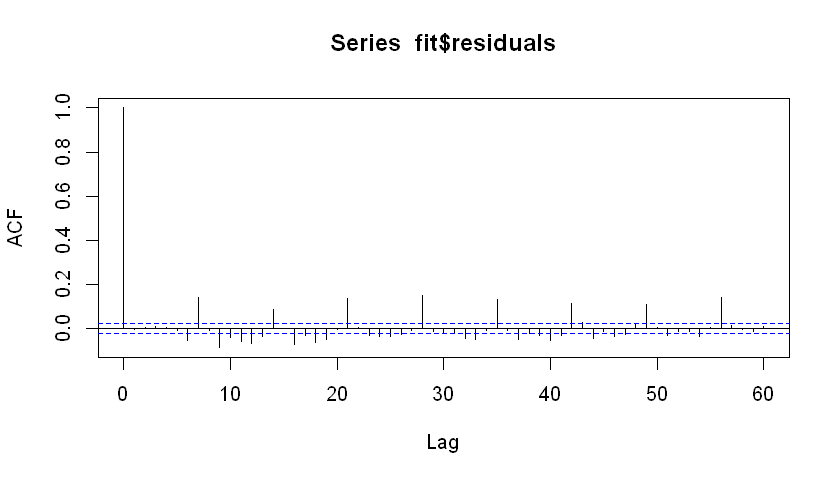

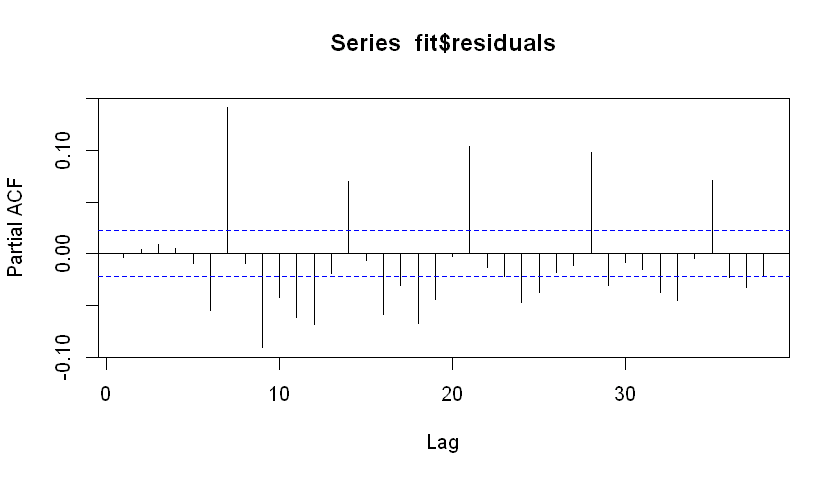

In [46]:
acf(fit$residuals,lag.max = 60)
pacf(fit$residuals)

Warning message:
In cvm.test((data^(lam[i]) - 1)/(lam[i])): p-value is smaller than 7.37e-10, cannot be computed more accuratelyWarning message:
In cvm.test((data^(lam[i]) - 1)/(lam[i])): p-value is smaller than 7.37e-10, cannot be computed more accuratelyWarning message:
In cvm.test((data^(lam[i]) - 1)/(lam[i])): p-value is smaller than 7.37e-10, cannot be computed more accuratelyWarning message:
In cvm.test((data^(lam[i]) - 1)/(lam[i])): p-value is smaller than 7.37e-10, cannot be computed more accuratelyWarning message:
In cvm.test((data^(lam[i]) - 1)/(lam[i])): p-value is smaller than 7.37e-10, cannot be computed more accuratelyWarning message:
In cvm.test((data^(lam[i]) - 1)/(lam[i])): p-value is smaller than 7.37e-10, cannot be computed more accuratelyWarning message:
In cvm.test((data^(lam[i]) - 1)/(lam[i])): p-value is smaller than 7.37e-10, cannot be computed more accuratelyWarning message:
In cvm.test((data^(lam[i]) - 1)/(lam[i])): p-value is smaller than 7.37e-10, cannot be 

,sw,ad,cvm,pt,sf,lt,jb,ac
lambda.hat,0.35,0.42,0.41,0.59,0.35,0.24,0.30,0.37
sw.pvalue,4.656839e-51,1.566036e-51,2.090456e-51,8.128329e-56,4.656839e-51,2.517955e-52,2.483981e-51,4.286149e-51
sf.pvalue,6.014666e-49,2.144594e-49,2.817964e-49,1.923848e-53,6.014666e-49,3.835343e-50,3.326742e-49,5.558264e-49
jb.pvalue,0,0,0,0,0,0,0,0


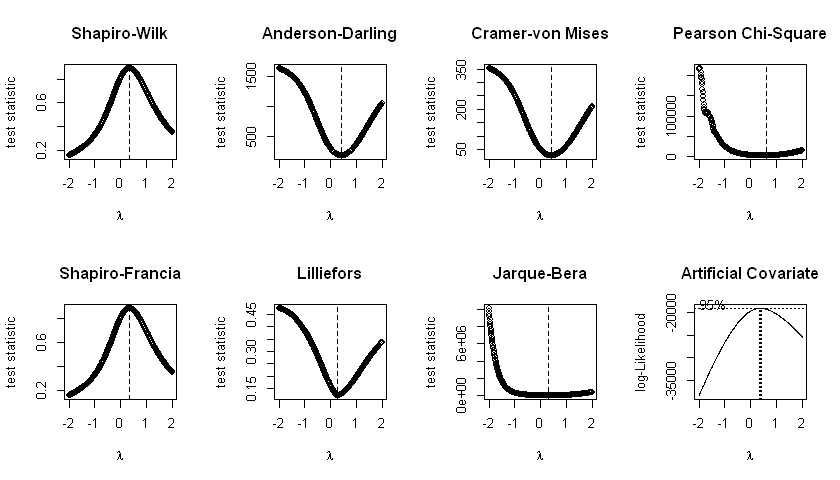

In [34]:
library(AID)
boxcoxnc(data = x[1:5000],lam = seq(-2,2,0.01),plotit = TRUE)

In [66]:
precios_box_cox<-aplicar_transformacion(serie = x,tipo = 6)

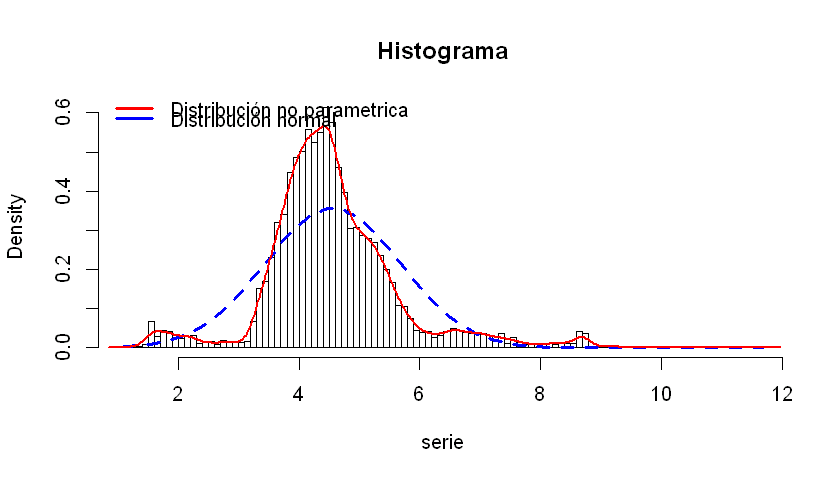

In [67]:
imprimir_histograma(serie = precios_box_cox)

In [68]:
estadisticos_basicos(precios_box_cox)

media    varianza   asimetria    curtosis      minimo      maximo 
   4.562290    1.254825    1.017526    4.153011    1.186658   11.616781 
total_datos 
7622.000000

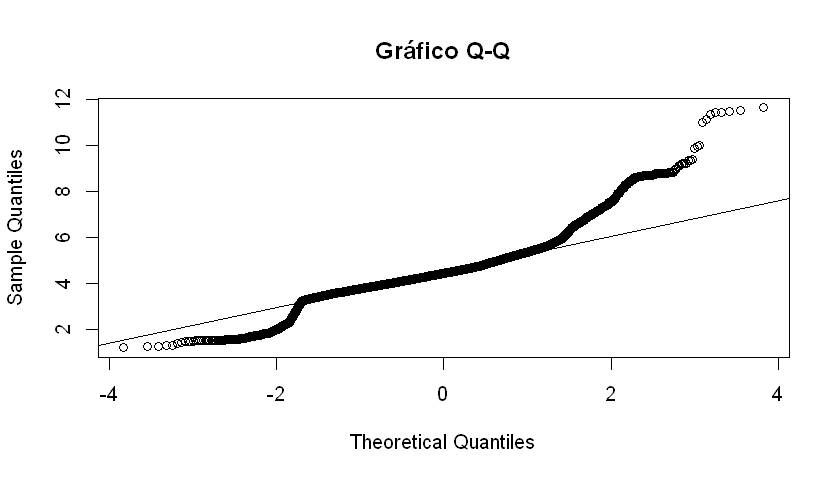

In [69]:
grafico_qqplot(precios_box_cox)

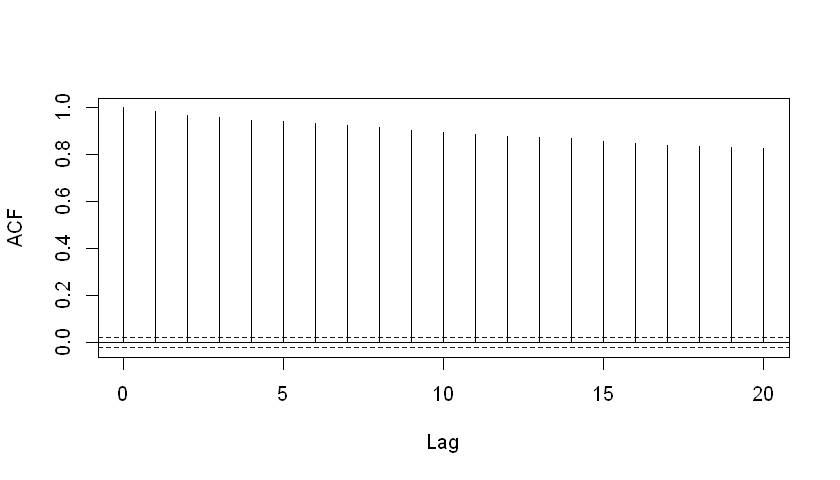

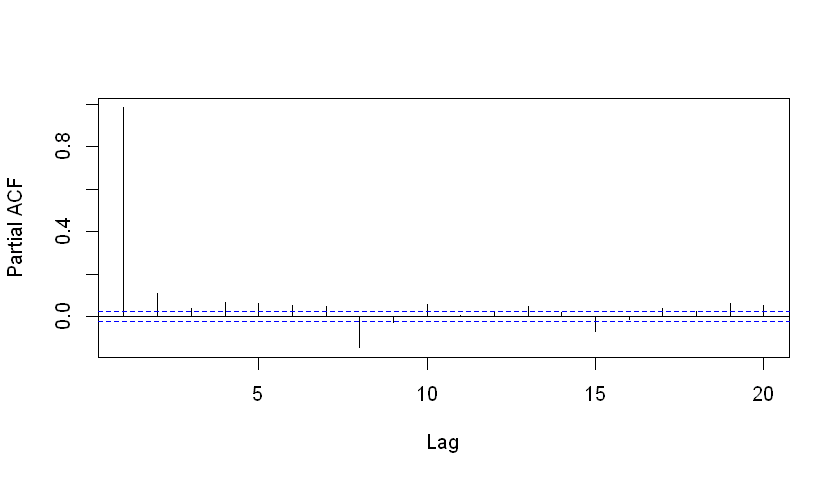

In [71]:
graficos_ACF(precios_box_cox,retardos = 20)